In [ ]:
import numpy as np
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")


### Shape of data

In [18]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


Epoch 1/50
53/53 [==============================] - 37s 243ms/step - loss: 1.5520 - accuracy: 0.2807 - val_loss: 1.5456 - val_accuracy: 0.2435
Epoch 2/50
53/53 [==============================] - 5s 85ms/step - loss: 1.4798 - accuracy: 0.3599 - val_loss: 1.5765 - val_accuracy: 0.2955
Epoch 3/50
53/53 [==============================] - 5s 86ms/step - loss: 1.4201 - accuracy: 0.3983 - val_loss: 1.5905 - val_accuracy: 0.2884
Epoch 4/50
53/53 [==============================] - 5s 86ms/step - loss: 1.3588 - accuracy: 0.4450 - val_loss: 1.6902 - val_accuracy: 0.2648
Epoch 5/50
53/53 [==============================] - 5s 85ms/step - loss: 1.3143 - accuracy: 0.4787 - val_loss: 1.6819 - val_accuracy: 0.2979
Epoch 6/50
53/53 [==============================] - 5s 92ms/step - loss: 1.2608 - accuracy: 0.5112 - val_loss: 1.7895 - val_accuracy: 0.2766
Epoch 7/50
53/53 [==============================] - 5s 94ms/step - loss: 1.1991 - accuracy: 0.5538 - val_loss: 1.8914 - val_accuracy: 0.2719
Epoch 8/50


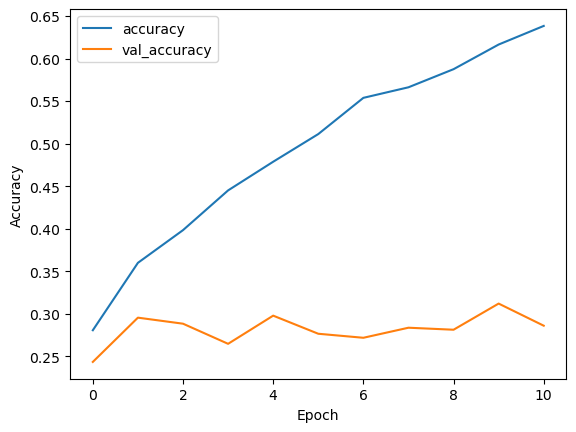

14/14 [==============================] - 14s 22ms/step
LSTM Model Test Accuracy: 0.345372460496614


In [33]:
from keras.layers import Input, LSTM, TimeDistributed, Dense, Flatten, Masking
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
import matplotlib.pyplot as plt
import numpy as np

# Load data
# Assuming X_train_valid, y_train_valid_preprocessed, X_test, y_test_preprocessed are loaded

# Adjust the time interval
# Assuming relevant_time_interval is the index range of the relevant time interval containing significant signal spikes
relevant_time_interval = slice(0, 500)  # Adjust this based on your data visualization

X_train_valid = X_train_valid[:, :, relevant_time_interval]
X_test = X_test[:, :, relevant_time_interval]

# Add Masking layer to handle variable sequence length
input_shape = (X_train_valid.shape[1], X_train_valid.shape[2])
inputs = Input(shape=input_shape)
masked_inputs = Masking(mask_value=0.0)(inputs)  # Assuming 0.0 represents padded values

# Adjust LSTM model architecture
x = masked_inputs
for _ in range(4):
    x = LSTM(16, return_sequences=True, dropout=0.4, kernel_regularizer=l2(0.001))(x)
x = Flatten()(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Create the LSTM model
lstm_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = lstm_model.fit(X_train_valid, y_train_valid_preprocessed, epochs=50, validation_split=0.2, 
                               callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)], 
                               batch_size=32, verbose=1)

# Plot training history
plt.plot(history_lstm.history['accuracy'], label='accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate model on test data
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=-1)
accuracy_lstm = accuracy_score(y_test_preprocessed, y_pred_lstm)
print('LSTM Model Test Accuracy:', accuracy_lstm)